# Predicing user Ad-click using Logistic Regresion

#### Import libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

read from the file

In [20]:
df = pd.read_csv('data/advertising.csv')

In [21]:
plt.style.use('ggplot')

### Exploratory Data Analysis

In [22]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [23]:
#check the number of records and columns
m,n = df.shape
print(f"No of records in the dfsets : {m}")
print(f"No of columns in the dfsets : {n}")

No of records in the dfsets : 1000
No of columns in the dfsets : 10


In [24]:
# data types
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [26]:
# check if any missing value in the dfset
print(f"dataset has {sum(df.isna().sum())} missing values")

dataset has 0 missing values


In [27]:
# description of the data
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [28]:
# returns the number of unique values fro each variable
df.nunique(axis=0)

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

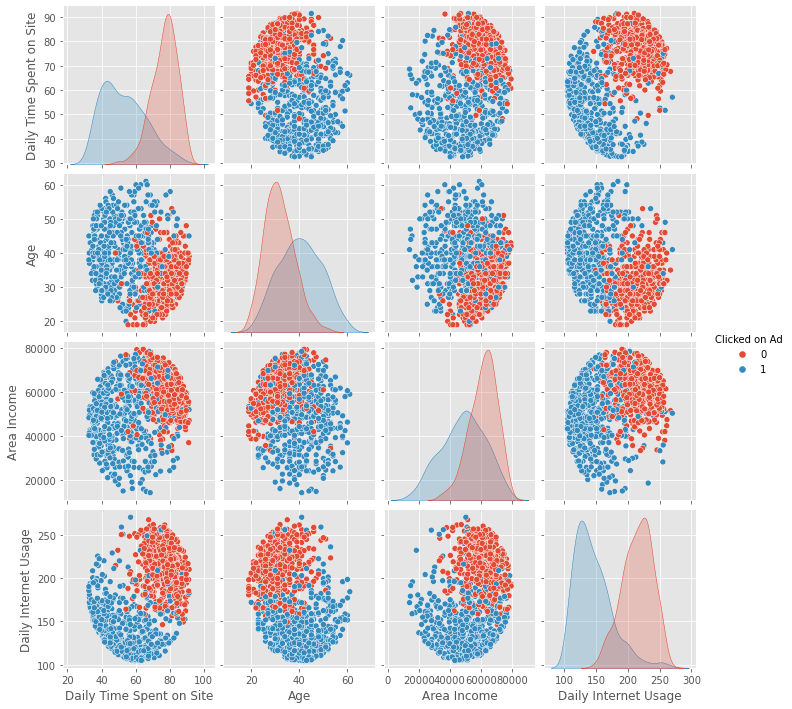

In [29]:
# pairplot to understand the relations
sns.pairplot(df.drop(['Male'],axis=1),hue='Clicked on Ad')

selecting the numerical columns

In [30]:
numeric_df = df.select_dtypes(include=np.number)

In [31]:
numeric_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


#### BOX PLOTS 
to summarize the distribution and identify the outliers

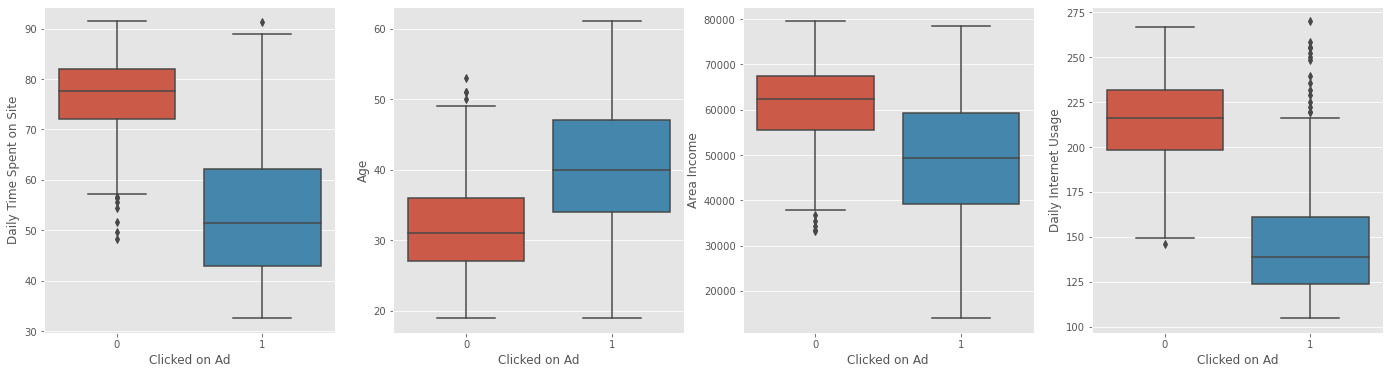

In [32]:
numeric_cols = numeric_df.drop(['Male'],axis=1).columns
fig, axes = plt.subplots(1,4,figsize=(24,6))
for i in range(len(numeric_cols)-1):
    sns.boxplot(ax=axes[i], x="Clicked on Ad",y=numeric_cols[i],data=df)

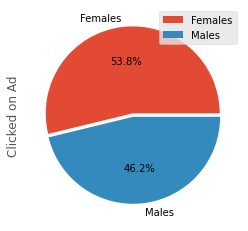

In [33]:
labels = ['Females','Males']
explode = (0.02,0.02)
df.groupby('Male').sum().plot(kind='pie',y='Clicked on Ad',autopct='%1.1f%%',labels=labels,explode=explode)
plt.show()

##### checking if the Timestamp column can help

In [34]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [35]:
#creating a temperory dataframe
temp = df.copy(deep=True)

In [41]:
temp['weekday'] = df['Timestamp'].dt.dayofweek 
pd.crosstab(temp['weekday'],df['Clicked on Ad'])

Clicked on Ad,0,1
weekday,,
0,68,72
1,67,55
2,77,79
3,63,79
4,84,71
5,62,64
6,79,80


In [40]:
temp['hour'] = df['Timestamp'].dt.hour
pd.crosstab(temp['hour'],temp['Clicked on Ad'])

Clicked on Ad,0,1
hour,,
0,19,26
1,16,16
2,19,17
3,19,23
4,21,21
5,23,21
6,16,23
7,28,26
8,22,21


In [42]:
temp['quarter'] = df['Timestamp'].dt.quarter
pd.crosstab(temp['quarter'],temp['Clicked on Ad'])

Clicked on Ad,0,1
quarter,,
1,237,226
2,212,224
3,51,50


In [43]:
pd.crosstab(temp['Timestamp'].dt.month,temp['Clicked on Ad'])

Clicked on Ad,0,1
Timestamp,,
1,78,69
2,77,83
3,82,74
4,73,74
5,68,79
6,71,71
7,51,50


There seems no clear patterns in timestamp column, mostly the distributions are the same

#### Feature selection

In [44]:
X = df[['Daily Time Spent on Site', 'Age','Area Income','Daily Internet Usage','Male']]
y = df['Clicked on Ad']

In [46]:
# spliiting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10,random_state=42)

### The logistic Regression Model

In [47]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [49]:
#prediction on the test data
y_pred = lr_model.predict(X_test)

### Evaluating performance of the mod